In [1]:
import numpy as np 
import matplotlib.pyplot as plt

from funicular import *

# Funicular Form using Desired Slope and Maximum Force Constraint

In [2]:
# 6 point loads
loads = [-1.6] * 6

# middle loads are spaced evenly, half on ends
spac = 18.125
X_loc=np.cumsum([spac/2]*2 + [spac]*5 + [spac/2])-spac/2

# Maximum load in chain
Fmax = 10

# Overall slope of the structure's endpoints
slope = 0

In [3]:
poly = funicular_polygon()
poly.set_loads(loads)

In [4]:
def get_origin(poly, slope, Fmax):
    # center of force
    cF = [0, poly.load_line[-1, 1]/2]
    
    
    origins = []
    for p in poly.load_line:
        intersects = get_intersect(slope, cF[0], cF[1], Fmax, p[0], p[1])

        for o in intersects:
            if np.nan not in o:
                poly.origin = o
                if len(np.where(poly.forces()-Fmax>10**-4)[0]) == 0 and o not in origins:
                    origins.append(o)
    
    return origins

In [5]:
origins = get_origin(poly, slope, Fmax)

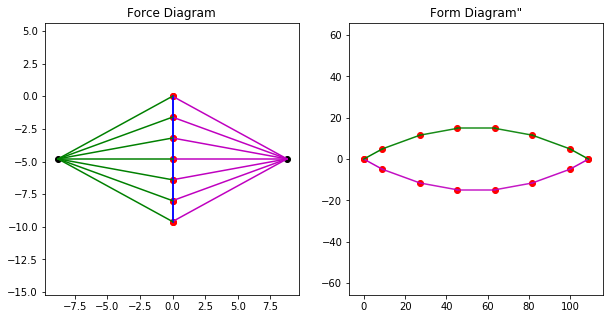

In [6]:
fig, ax = plt.subplots(1, 2, figsize = (10, 5))

colors = ['m', 'g', 'c', 'y']

for i, o in enumerate(origins):
    poly.origin = o
    poly.get_geometry(X_loc)
    
    poly.plot_force(ax=ax[0], m_color=colors[i])
    poly.plot_form(ax=ax[1], m_color=colors[i])

ax[0].set_title('Force Diagram')
ax[1].set_title('Form Diagram"')
for a in ax:
    a.axis('equal')